# Train 데이터 모델링

In [90]:
import pandas as pd
from datetime import datetime

perform_df = pd.read_json('datas/raw_data/raw_perform.json')
rating_df = pd.read_json('datas/raw_data/raw_rating.json')

# Datetime으로 변환
perform_df.dropna(inplace=True)

perform_df['방송일시'] = list(map(lambda i : datetime.fromtimestamp(i/1000), perform_df['방송일시']))
perform_df['판매단가'] = list(map(lambda i : int(i.replace(',','')) if i != None else None, perform_df['판매단가']))
perform_df[' 취급액 '] = list(map(lambda i : int(i.replace(',','')) if i != None else None, perform_df[' 취급액 ']))

In [135]:
perform_df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,의류,속옷,...,농수축,이미용,가전,생활용품,건강기능,잡화,무형,가구,침구,평균시청률
0,2019-01-01 15:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,0,...,0,0,0,0,0,0,0,0,0,0.008714
1,2019-01-01 15:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,0,...,0,0,0,0,0,0,0,0,0,0.008714
2,2019-01-01 15:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,0,...,0,0,0,0,0,0,0,0,0,0.012286
3,2019-01-01 15:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,0,...,0,0,0,0,0,0,0,0,0,0.012286
4,2019-01-01 15:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,0,...,0,0,0,0,0,0,0,0,0,0.011429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,2019-12-31 22:00:00,20,100837,202480,일시불 쿠쿠전기밥솥 10인용 (QS),주방,208000,28898000,0,0,...,0,0,0,0,0,0,0,0,0,0.000571
38241,2019-12-31 22:00:00,20,100837,202470,무이자 쿠쿠전기밥솥 6인용(QS),주방,208000,5527000,0,0,...,0,0,0,0,0,0,0,0,0,0.000571
38242,2019-12-31 22:00:00,20,100837,202473,일시불 쿠쿠전기밥솥 6인용(QS),주방,198000,11220000,0,0,...,0,0,0,0,0,0,0,0,0,0.000571
38244,2019-12-31 23:20:00,20,100378,201235,베지밀 검은콩 두유 96팩,건강기능,50900,18427000,0,0,...,0,0,0,0,1,0,0,0,0,0.000000


In [113]:
from datetime import timedelta

In [117]:
rating_df.set_index('시간대', inplace=True)

In [123]:
perform_df = perform_df[perform_df['방송일시'] < datetime(2020,1,1)]

In [167]:
# 이전날짜 것으로 변경하면 같은날짜 24:00 으로 찾기 가능
rating_df.loc['24:00'][:-1] = rating_df.loc['00:00'][1:]

In [168]:
rating_df.loc[['24:00','00:00']][:]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
24:00,0.04,0.00,0.0,0.0,0.0,0.0,0.015,0.000,0.0,0.0,...,0.013,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.024,0.000
00:00,0.00,0.04,0.0,0.0,0.0,0.0,0.000,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.024


In [147]:
# 확인용
rating_df.loc[['00:00', '24:00']]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
00:00,0.0,0.04,0.00,0.0,0.0,0.0,0.0,0.015,0.000,0.0,...,0.0,0.013,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.024
24:00,0.0,0.00,0.04,0.0,0.0,0.0,0.0,0.000,0.015,0.0,...,0.0,0.000,0.013,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [169]:
perform_df['평균시청률'] = list(map(lambda i : rating_df[str(i['방송일시'])[:10]][str(i['방송일시'])[11:16]:str(i['방송일시'] + timedelta(minutes = int(i['노출(분)'])))[11:16]].mean(), perform_df.iloc))

In [178]:
perform_df.dropna(inplace=True)

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [8]:
c_feature = perform_df['상품군'].unique()

In [13]:
dataset = pd.DataFrame(c_feature).T

In [14]:
dataset.columns = c_feature

In [17]:
dataset.drop(0,inplace=True)

In [18]:
dataset

,의류,속옷,주방,농수축,이미용,가전,생활용품,건강기능,잡화,무형,가구,침구


In [96]:
for c in c_feature:
    perform_df[c] = 0 

In [22]:
category = list(perform_df['상품군'])

In [97]:
for i,c in enumerate(category):
    perform_df[c][i] = 1

In [83]:
perform_df.dropna(inplace=True)

In [171]:
features = ['노출(분)','판매단가','평균시청률']
features.extend(list(c_feature))

In [179]:
perform_df[features].isnull().sum()

노출(분)    0
판매단가     0
평균시청률    0
의류       0
속옷       0
주방       0
농수축      0
이미용      0
가전       0
생활용품     0
건강기능     0
잡화       0
무형       0
가구       0
침구       0
dtype: int64

In [188]:
# perform_df[features]

,노출(분),판매단가,평균시청률,의류,속옷,주방,농수축,이미용,가전,생활용품,건강기능,잡화,무형,가구,침구
0,20,39900,0.008714,1,0,0,0,0,0,0,0,0,0,0,0
1,20,39900,0.008714,1,0,0,0,0,0,0,0,0,0,0,0
2,20,39900,0.012286,1,0,0,0,0,0,0,0,0,0,0,0
3,20,39900,0.012286,1,0,0,0,0,0,0,0,0,0,0,0
4,20,39900,0.011429,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,20,208000,0.000571,0,0,1,0,0,0,0,0,0,0,0,0
38241,20,208000,0.000571,0,0,1,0,0,0,0,0,0,0,0,0
38242,20,198000,0.000571,0,0,1,0,0,0,0,0,0,0,0,0
38244,20,50900,0.000000,0,0,0,0,0,0,0,1,0,0,0,0


In [180]:
# import numpy as np
X_datas = np.matrix(perform_df[features])

In [181]:
y_datas = np.array(perform_df[' 취급액 '])

In [182]:
y_datas

array([ 2099000,  4371000,  3262000, ..., 11220000, 18427000, 28317000],
      dtype=int64)

In [24]:
dataset

,의류,속옷,주방,농수축,이미용,가전,생활용품,건강기능,잡화,무형,가구,침구


In [ ]:
# import nltk

# fdist = nltk.FreqDist(perform_df['상품군'])

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_datas, y_datas, test_size=0.8, shuffle=True)

In [184]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
y_pred = lr.predict(X_test)

In [195]:
error = y_pred-y_test

In [ ]:
# 평균시청률은 단위가 낮아서 그런지 크게 영향을 미치지 않는 느낌

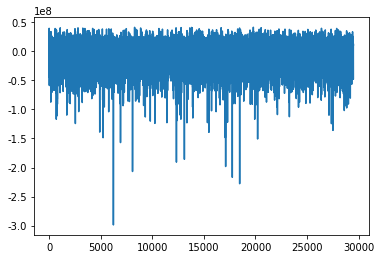

In [196]:
import matplotlib.pyplot as plt

plt.plot(error)

In [197]:
lr.score(X_test, y_test)

0.2080823701005191

# 딥러닝 모델로 변경 필요 어떤 모델?